<a href="https://colab.research.google.com/github/vanitaPalanki/AI_ML_Internship_Work/blob/main/int_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import 2 audio signals read the data, change the samplerate = 1000, perform LPF and HPF with cutoff = 100 and order = 4, and plot all the graphs using matplotlib subplot.

In [ ]:
pip install pydub numpy

Text(0, 0.5, 'Amplitude')

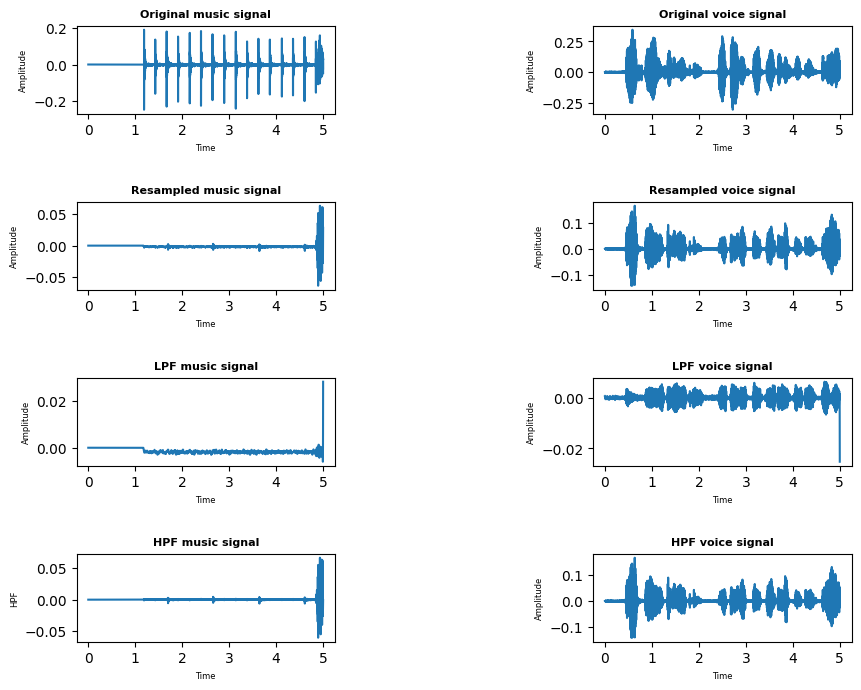

In [ ]:
from pydub import AudioSegment
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import signal
import librosa

data1, fs_music  = librosa.load('/content/files/BabyElephantWalk60.wav', mono = True,  duration = 5.0)
data2, fs_voice  = librosa.load('/content/files/gettysburg10.wav', mono = True,  duration = 5.0)

length1 = len(data1)
length2 = len(data2)

t1 = np.linspace(0, length1/fs_music, length1)
t2 = np.linspace(0, length2/fs_voice, length2)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

plt.subplot(4,2,1)
plt.plot(t1, data1)
plt.title("Original music signal", fontsize=8, fontweight = "bold")
plt.xlabel("Time", fontsize=6)
plt.ylabel("Amplitude", fontsize=6)
plt.subplots_adjust(wspace=1.0, hspace=1.0)

plt.subplot(4,2,2)
plt.plot(t2, data2)
plt.title("Original voice signal", fontsize=8, fontweight = "bold")
plt.xlabel("Time", fontsize=6)
plt.ylabel("Amplitude", fontsize=6)

#####################################################################################################################################

resampled_data1, fs1 = librosa.load('/content/files/BabyElephantWalk60.wav', sr= 1000, mono = True,  duration = 5.0)
resampled_data2, fs2 = librosa.load('/content/files/gettysburg10.wav', sr= 1000, mono = True,  duration = 5.0)

Sampled_t1 = np.linspace(0, len(resampled_data1)/fs1, len(resampled_data1))
Sampled_t2 = np.linspace(0, len(resampled_data2)/fs2, len(resampled_data2))

plt.subplot(4,2,3)
plt.plot(Sampled_t1, resampled_data1)
plt.title("Resampled music signal", fontsize=8, fontweight = "bold")
plt.xlabel("Time", fontsize=6)
plt.ylabel("Amplitude", fontsize=6)

plt.subplot(4,2,4)
plt.title("Resampled voice signal", fontsize=8, fontweight = "bold")
plt.xlabel("Time", fontsize=6)
plt.ylabel("Amplitude", fontsize=6)
plt.plot(Sampled_t2, resampled_data2)


######################################################################################################################################

fs = 1000/2

b, a = signal.butter(4, 100/fs, btype='lowpass', analog = False)
output_music_low = signal.filtfilt(b, a, resampled_data1)
output_voice_low = signal.filtfilt(b, a, resampled_data2)

plt.subplot(4,2,5)
plt.plot(Sampled_t1, output_music_low)
plt.title("LPF music signal", fontsize=8, fontweight = "bold")
plt.xlabel("Time", fontsize=6)
plt.ylabel("Amplitude", fontsize=6)

plt.subplot(4,2,6)
plt.plot(Sampled_t2, output_voice_low)
plt.title("LPF voice signal", fontsize=8, fontweight = "bold")
plt.xlabel("Time", fontsize=6)
plt.ylabel("Amplitude", fontsize=6)

######################################################################################################################################

b, a = signal.butter(4, 100/fs, btype = 'highpass', analog = False)
output_music_high = signal.filtfilt(b, a, resampled_data1)
output_voice_high = signal.filtfilt(b, a, resampled_data2)

plt.subplot(4,2,7,)
plt.plot(Sampled_t1, output_music_high)
plt.title("HPF music signal", fontsize=8, fontweight = "bold")
plt.xlabel("Time", fontsize=6)
plt.ylabel("HPF", fontsize=6)

plt.subplot(4,2,8)
plt.plot(Sampled_t2, output_voice_high)
plt.title("HPF voice signal", fontsize=8, fontweight = "bold")
plt.xlabel("Time", fontsize=6)
plt.ylabel("Amplitude", fontsize=6)